In [1]:
import pandas as pd
from sklearn.preprocessing import Imputer

Data Preprocessing
Removing and imputing missing values from the dataset
Missing one or more values may occur because of equipment failure, observations that were not recorded,
data corruption, incorrect measurements, some fields left blank
Missing value can be seen as blank space or as NaN
This may cause unpredictable result if ignored
For large DataFrame its difficult to look for missing values manually, 
We use the isnull method to return a DataFrame with Boolean values 
that indicate whether a cell contains a numeric value (False) or if data is missing (True). 
Using the sum method, we get  the number of missing values per column


In [2]:
df = pd.read_csv("missingvalue.csv")


In [3]:
print(df)


    A     B     C
0  15  13.0  13.0
1  34  45.0  34.0
2  23  16.0  22.0
3  28   NaN   NaN
4  24  32.0  45.0
5  38  18.0   NaN
6  21  24.0  38.0


DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
Return object with labels on given axis omitted where alternately any or all of the data are missing
axis : {0 or ‘index’, 1 or ‘columns’}, or tuple/list thereof
        Pass tuple or list to drop on multiple axes
how : {‘any’, ‘all’}
any : if any NA values are present, drop that label
all : if all values are NA, drop that label
thresh : int, default None
int value : require that many non-NA values
subset : array-like
Labels along other axis to consider, e.g. if you are dropping rows these would be a list of columns to include
inplace : boolean, default False
If True, do operation inplace and return None.

In [4]:
df.isnull()

,A,B,C
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,True
4,False,False,False
5,False,False,True
6,False,False,False


In [5]:
df.isnull().sum()

A    0
B    1
C    2
dtype: int64

Eliminating samples or features with missing data.
Removing samples(row) from the dataset usuing dropna method

In [6]:
df.dropna(axis=0)

,A,B,C
0,15,13.0,13.0
1,34,45.0,34.0
2,23,16.0,22.0
4,24,32.0,45.0
6,21,24.0,38.0


Removing features(columns) from the dataset 

In [7]:
df.dropna(axis=1)

,A
0,15
1,34
2,23
3,28
4,24
5,38
6,21


Disadvantages:Removal of missing data may end up removing too many samples or feature columns
results in losing valuable information.
So the alternative method to handle missing data is interpolation.
There are various interpolation techniques,most commom is mean imputation,where the missing value 
is replaced by the mean of the entire feature column

class sklearn.preprocessing.Imputer(missing_values=’NaN’, strategy=’mean’, axis=0, verbose=0, copy=True)
strategy : string, optional (default=”mean”)
The imputation strategy.
If “mean”, then replace missing values using the mean along the axis.
If “median”, then replace missing values using the median along the axis.
If “most_frequent”, then replace missing using the most frequent value along the axis.

axis : integer, optional (default=0)
The axis along which to impute.
If axis=0, then impute along columns.
If axis=1, then impute along rows.

In [8]:
impr = Imputer(missing_values='NaN', strategy='mean', axis=0)

In [9]:
x = impr.fit_transform(df)

In [10]:
x

array([[ 15.        ,  13.        ,  13.        ],
       [ 34.        ,  45.        ,  34.        ],
       [ 23.        ,  16.        ,  22.        ],
       [ 28.        ,  24.66666667,  30.4       ],
       [ 24.        ,  32.        ,  45.        ],
       [ 38.        ,  18.        ,  30.4       ],
       [ 21.        ,  24.        ,  38.        ]])

NaN value is replaced by the mean of the corresponding feature column

In [11]:
import pandas as pd
import seaborn as sns
%matplotlib inline
df = pd.DataFrame(data = x,columns=['x', 'y', 'z'])

In [12]:
df

,x,y,z
0,15.0,13.000000,13.0
1,34.0,45.000000,34.0
2,23.0,16.000000,22.0
3,28.0,24.666667,30.4
4,24.0,32.000000,45.0
5,38.0,18.000000,30.4
6,21.0,24.000000,38.0


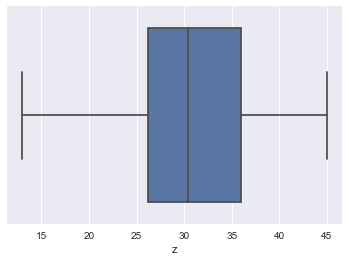

In [13]:
sns.boxplot(df['z'])

In [14]:
q1 = df['z'].quantile(.25)

In [15]:
q1

26.2

In [16]:
q3 = df['z'].quantile(.75)

In [17]:
q3

36.0

In [18]:
iqr = q3-q1

In [19]:
iqr

9.8

In [20]:
toprange = q3 + 1.5 * iqr

In [21]:
toprange

50.7

In [22]:
botrange = q1 - 1.5 * iqr
botrange

11.499999999999998

In [23]:

df

,x,y,z
0,15.0,13.000000,13.0
1,34.0,45.000000,34.0
2,23.0,16.000000,22.0
3,28.0,24.666667,30.4
4,24.0,32.000000,45.0
5,38.0,18.000000,30.4
6,21.0,24.000000,38.0


In [24]:
df[df['z'] > toprange]

,x,y,z


In [25]:
df[df['z'] > 23].index

Int64Index([1, 3, 4, 5, 6], dtype='int64')

In [26]:
dropdf = df.drop(df[df['z'] > toprange].index)
dropdf
 

,x,y,z
0,15.0,13.000000,13.0
1,34.0,45.000000,34.0
2,23.0,16.000000,22.0
3,28.0,24.666667,30.4
4,24.0,32.000000,45.0
5,38.0,18.000000,30.4
6,21.0,24.000000,38.0


In [27]:
dropdf = dropdf.drop(dropdf[dropdf['z'] < botrange].index)

In [29]:
dropdf

,x,y,z
0,15.0,13.000000,13.0
1,34.0,45.000000,34.0
2,23.0,16.000000,22.0
3,28.0,24.666667,30.4
4,24.0,32.000000,45.0
5,38.0,18.000000,30.4
6,21.0,24.000000,38.0


In [ ]:
%matplotlib inline

In [2]:
dropdf = dropdf.drop('y',axis = 1)

NameError: name 'dropdf' is not defined

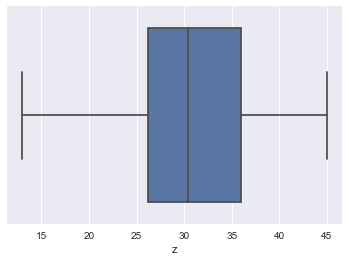

In [30]:
sns.boxplot(dropdf['z'])